<a href="https://colab.research.google.com/github/anuragvishwakarma02hotmail/12AprilExercise/blob/main/EY_ClassificationTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Complete the notebook to perform

# Data Exploration

# Feature Engineering

# Model Training and Evaluation to select the best model


import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY8Apr2024-AI-Batch2/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

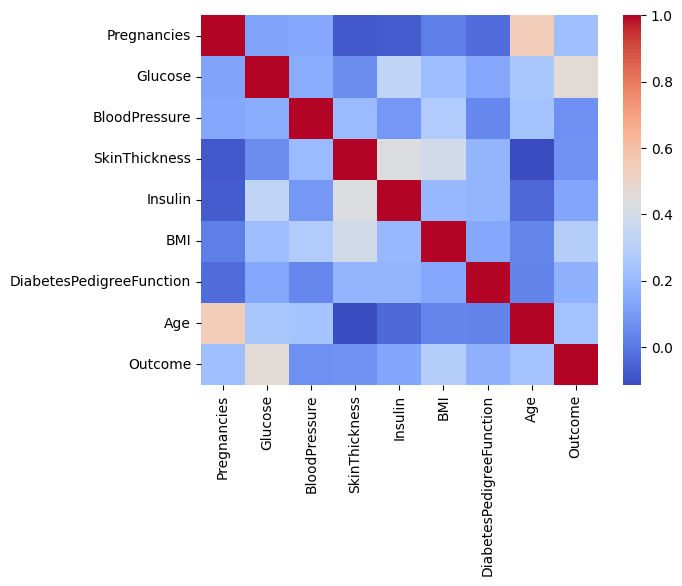

In [80]:
#HeatMap
import seaborn as sns
cors=data.corr() #All data are numbers
sns.heatmap(cors, cmap = 'coolwarm')

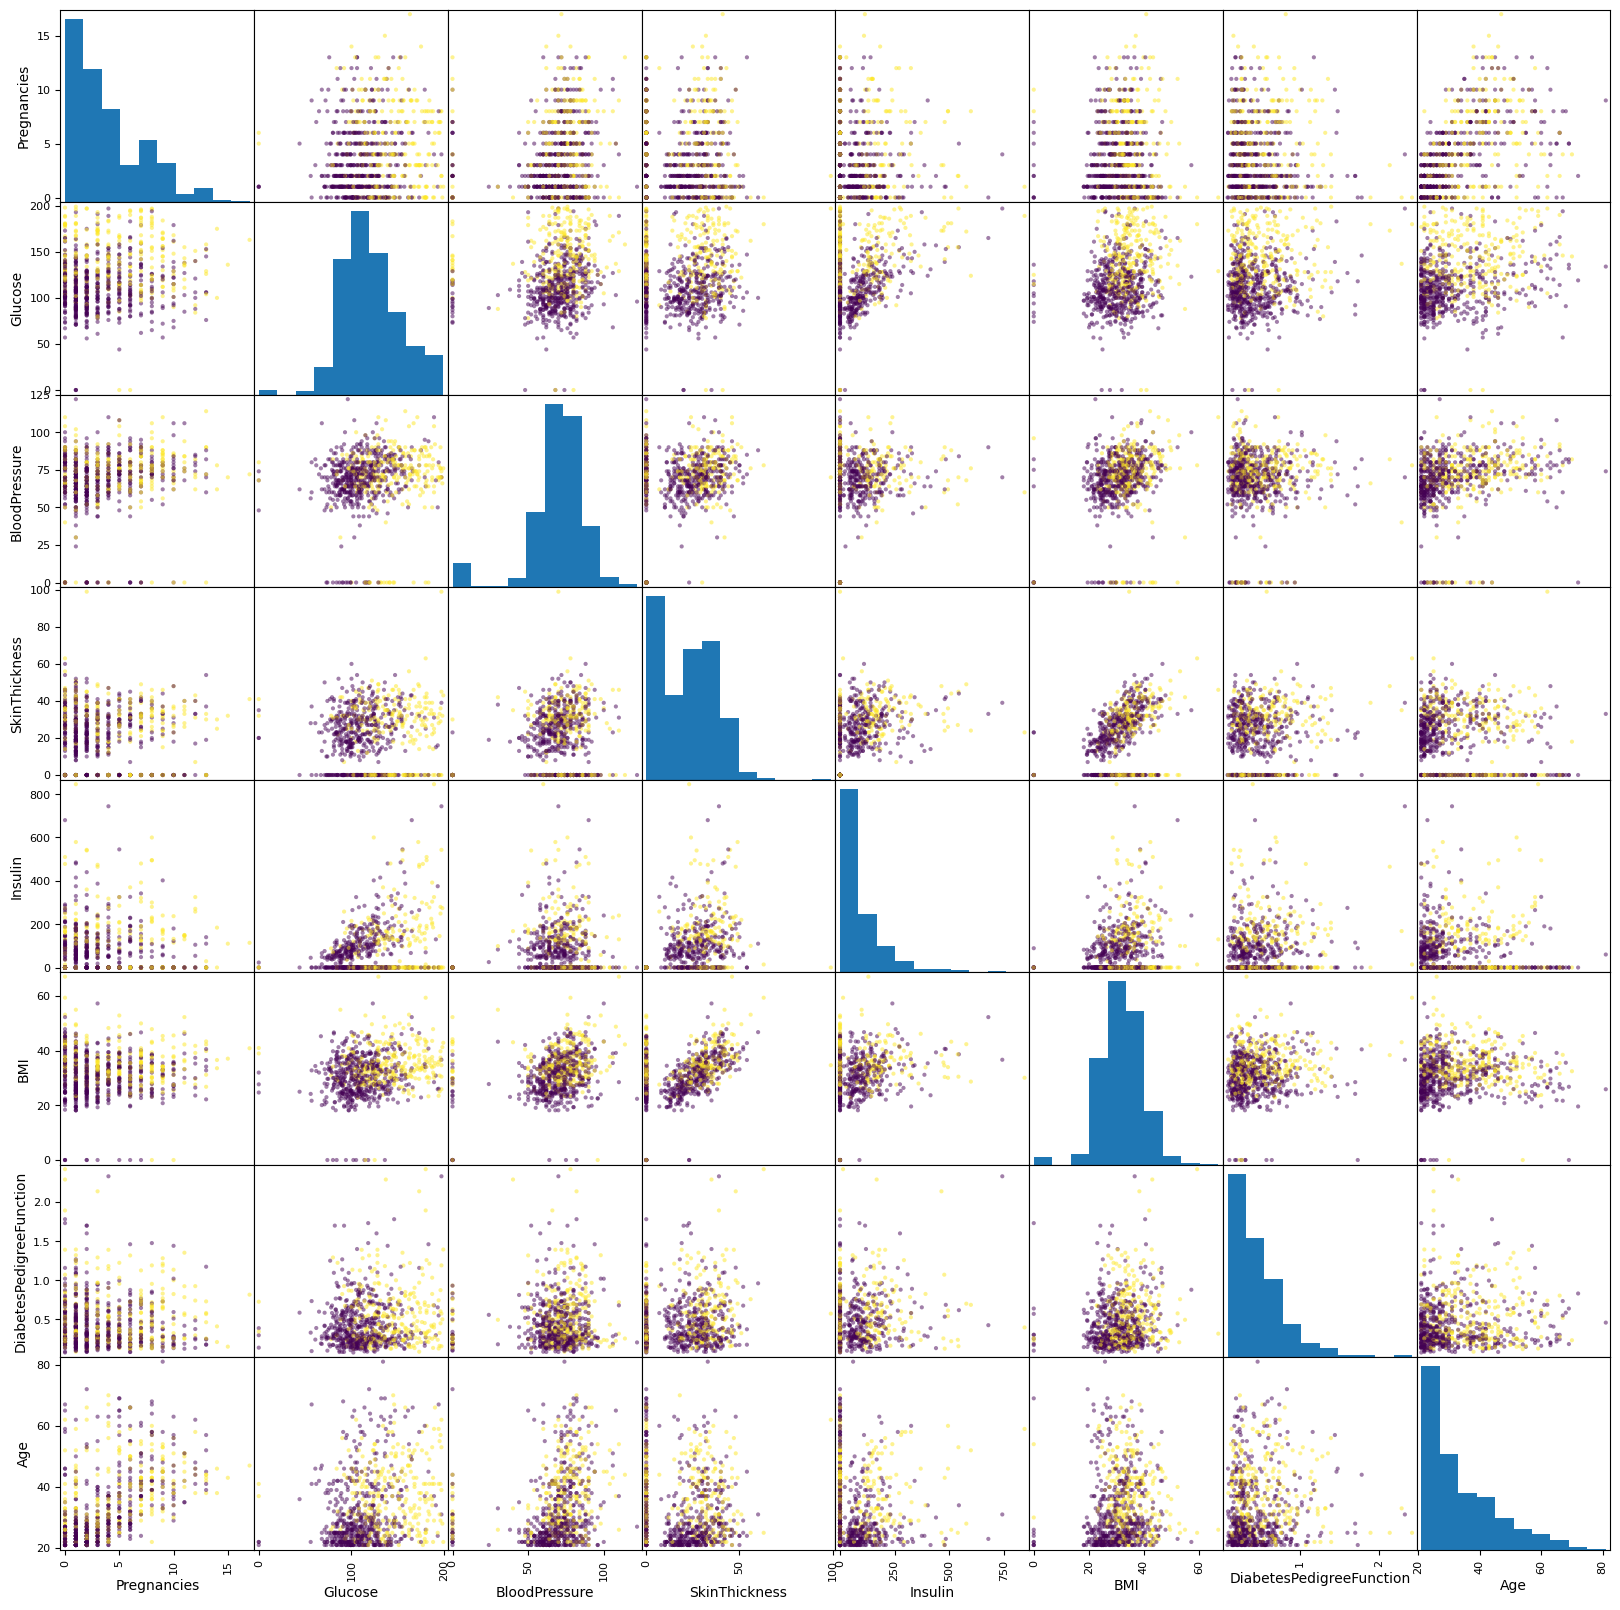

In [81]:
y=data["Outcome"]
sm = pd.plotting.scatter_matrix(data.drop(['Outcome'], axis=1), c=y ,figsize=(20,20))

In [82]:

#Seperate output columns
x = data.iloc[:,:-1]
x.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [83]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [84]:
# print(xtrain.head(5))
# print(ytrain.head(5))
# print(xtest.head(5))
print(ytest.head(5))

437    0
541    1
578    0
164    1
60     0
Name: Outcome, dtype: int64


In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [86]:
# Using z-score  mu- mean  and sigma -std

mu = xtrain.describe().T['mean']

sigma = xtrain.describe().T['std']
print(mu)
print("--------------------")
print(sigma)



Pregnancies                   3.894137
Glucose                     121.105863
BloodPressure                68.866450
SkinThickness                20.710098
Insulin                      83.252443
BMI                          32.160912
DiabetesPedigreeFunction      0.478091
Age                          33.604235
Name: mean, dtype: float64
--------------------
Pregnancies                   3.420531
Glucose                      32.770001
BloodPressure                19.882733
SkinThickness                16.033733
Insulin                     120.281643
BMI                           7.917565
DiabetesPedigreeFunction      0.339884
Age                          11.984277
Name: std, dtype: float64


In [87]:
#normalize the data for training and testing

xtrain_norm = (xtrain - mu) / sigma
xtest_norm = (xtest - mu) / sigma

In [88]:
print(xtrain_norm.max())
print("---------------------------")
print(xtrain_norm.min())
print("---------------------------")
print(xtest_norm.max())
print("---------------------------")
print(xtest_norm.min())


Pregnancies                 3.831529
Glucose                     2.376995
BloodPressure               2.672346
SkinThickness               4.882824
Insulin                     6.341346
BMI                         4.412858
DiabetesPedigreeFunction    5.713446
Age                         3.954829
dtype: float64
---------------------------
Pregnancies                -1.138460
Glucose                    -3.695632
BloodPressure              -3.463631
SkinThickness              -1.291658
Insulin                    -0.692146
BMI                        -4.061970
DiabetesPedigreeFunction   -1.177141
Age                        -1.051731
dtype: float64
---------------------------
Pregnancies                 2.662120
Glucose                     2.285448
BloodPressure               2.068808
SkinThickness               1.889136
Insulin                     3.298488
BMI                         2.253103
DiabetesPedigreeFunction    3.833393
Age                         2.953517
dtype: float64
-----------

In [89]:
#Checking outliers in all xtrain

outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]


all_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,isOutlier
145,-1.138460,-0.583029,0.308486,0.142818,-0.692146,-4.061970,0.276297,-1.051731,1
336,-1.138460,-0.125293,-3.463631,-1.291658,-0.692146,0.207019,1.335482,0.867450,1
342,-0.846108,-3.695632,-0.043578,0.891240,-0.692146,-0.020323,-0.262122,-0.968288,1
177,-1.138460,0.240895,2.068808,1.577293,0.388651,4.412858,-0.468075,-0.634518,1
684,0.323302,0.454505,0.660551,-1.291658,-0.692146,-4.061970,0.476365,2.953517,1
...,...,...,...,...,...,...,...,...,...
349,0.323302,-3.695632,0.559961,0.704134,-0.692146,1.116390,-0.388636,0.283352,1
266,-1.138460,0.515537,-3.463631,-1.291658,-0.692146,0.522773,1.338424,-0.717960,1
533,0.615654,-0.918702,-3.463631,-1.291658,-0.692146,-0.298187,0.067402,-0.217304,1
300,-1.138460,1.400492,-3.463631,-1.291658,-0.692146,0.017567,1.061859,-0.300747,1


In [90]:
print(all_outliers.index," len-",len(all_outliers.index))

Index([145, 336, 342, 177, 684, 371, 172, 247,  78, 468, 695, 347, 395, 435,
       666, 409, 522, 426, 357, 673, 222, 269, 430, 535, 186, 111, 502, 370,
       182, 459,  45, 621, 453, 220, 643, 193,   7, 159, 604, 494, 228,  13,
       445,  75,   8, 579,  49, 655, 286, 332, 619,  88, 415,  81, 153, 593,
       484, 589, 601,   4, 697, 584,   9, 261, 349, 266, 533, 300, 753],
      dtype='int64')  len- 69


In [91]:
#Updating all outliers to 3 or -3 in xtrain

for myindex in all_outliers.index:
  for col_name in xtrain_norm.columns:
    datapoint = xtrain_norm.loc[myindex, [col_name]]
    if(datapoint[0] > 3):
      xtrain_norm.loc[myindex, [col_name]] = 3.0

    if( datapoint[0] < -3 ):
      xtrain_norm.loc[myindex, [col_name]] = -3.0

# check again if any outliers are still present
outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]
xtrain_norm = xtrain_norm.iloc[:, :-1]

print('Pending outliers = ',all_outliers.index)

xtrain_norm.columns

Pending outliers =  Index([], dtype='int64')


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [92]:
print(xtrain_norm.max())
print("---------------------------")
print(xtrain_norm.min())
print("---------------------------")
print(xtest_norm.max())
print("---------------------------")
print(xtest_norm.min())

##Outliers left on xtest not treated


Pregnancies                 3.000000
Glucose                     2.376995
BloodPressure               2.672346
SkinThickness               3.000000
Insulin                     3.000000
BMI                         3.000000
DiabetesPedigreeFunction    3.000000
Age                         3.000000
dtype: float64
---------------------------
Pregnancies                -1.138460
Glucose                    -3.000000
BloodPressure              -3.000000
SkinThickness              -1.291658
Insulin                    -0.692146
BMI                        -3.000000
DiabetesPedigreeFunction   -1.177141
Age                        -1.051731
dtype: float64
---------------------------
Pregnancies                 2.662120
Glucose                     2.285448
BloodPressure               2.068808
SkinThickness               1.889136
Insulin                     3.298488
BMI                         2.253103
DiabetesPedigreeFunction    3.833393
Age                         2.953517
dtype: float64
-----------

In [93]:
print(xtest_norm)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
437     0.323302  0.790178       0.308486      -1.291658 -0.692146 -0.285556   
541    -0.261403  0.210380       0.157602       0.267555  0.887480  0.030197   
578     1.785063  0.362958      -0.043578      -1.291658 -0.692146 -0.651831   
164    -1.138460  0.301927       0.962320      -1.291658 -0.692146 -0.070844   
60     -0.553755 -1.132312      -3.463631      -1.291658 -0.692146 -4.061970   
..           ...       ...            ...            ...       ...       ...   
96     -0.553755 -0.888186      -0.345347       0.454660 -0.692146 -0.070844   
359    -0.846108  2.285448       0.358781       0.953608  1.377995  0.548033   
123     0.323302  0.332442       0.559961      -1.291658 -0.692146 -0.677091   
576     0.615654 -0.399935      -1.250655      -0.044288  0.388651 -1.030735   
497    -0.553755 -1.223859       0.157602      -0.356130 -0.060296 -0.260296   

     DiabetesPedigreeFunction       Age

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# in case of trees-> we could fluctuate the depth of tree
# in case of ensembles (forests or jungles) -> we could fluctuate no. of trees

# Hyperparameters-> values that we adjust from our side as AI/ML engineers
# -> ASSUMPTIONS from our end
# -> these adjustments result in different models out of same algorithms!

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "DecisionTree10": DecisionTreeClassifier(max_depth=10),
    "DecisionTree200": DecisionTreeClassifier(max_depth=200),
    "DecisionTree50": DecisionTreeClassifier(max_depth=50),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "RandomForest100": RandomForestClassifier(n_estimators=100),
    "RandomForest200": RandomForestClassifier(n_estimators=200),
    "RandomForest300": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
    "Support Vector Machines with RBF": SVC(kernel='rbf')
}

In [95]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

best_model_acc = None
best_model_f1 = None
best_model_p = None
best_model_r = None

best_model_name_acc = ""
best_model_name_f1 = ""
best_model_name_p = ""
best_model_name_r = ""

best_acc = -1
best_f1 = -1
best_precision = -1
best_recall = -1


all_accs = []
all_f1_scores = []
all_precions = []
all_recalls = []



In [96]:
for algo_name, algo in my_algos.items():
  print('Algorithm considered = ' + algo_name)
  model = algo
  model.fit(xtrain_norm, ytrain)
  p = model.predict(xtest_norm)
  a_score = accuracy_score(p, ytest)
  p_score = precision_score(p, ytest)
  r_score = recall_score(p, ytest)
  f_score = f1_score(p, ytest)


  all_accs.append(a_score)
  all_f1_scores.append(f_score)
  all_precions.append(p_score)
  all_recalls.append(r_score)
  print('Accuracy = ' + str(a_score))
  print('Precision = ' + str(p_score))
  print('Recall = ' + str(r_score))
  print('F1 Score = ' + str(f_score))


  if a_score == 1.0: # if any model is 100% accurate, its a sign of overfitting
    print('Overfitting')

  else:
    if a_score > best_acc:
      best_acc = a_score
      best_model_acc = algo
      best_model_name_acc = algo_name
    if f_score > best_f1:
      best_f1 = f_score

      best_model_f1 = algo
      best_model_name_f1 = algo_name
    if p_score > best_precision:
      best_precision = p_score
      best_model_p = algo
      best_model_name_p = algo_name
    if r_score > best_recall:
      best_recall = r_score
      best_model_r = algo
      best_model_name_r = algo_name
  print('*************')
  print()

Algorithm considered = DecisionTree100
Accuracy = 0.6753246753246753
Precision = 0.5416666666666666
Recall = 0.48148148148148145
F1 Score = 0.5098039215686274
*************

Algorithm considered = DecisionTree10
Accuracy = 0.7272727272727273
Precision = 0.5416666666666666
Recall = 0.5652173913043478
F1 Score = 0.5531914893617021
*************

Algorithm considered = DecisionTree200
Accuracy = 0.7012987012987013
Precision = 0.6041666666666666
Recall = 0.5178571428571429
F1 Score = 0.5576923076923077
*************

Algorithm considered = DecisionTree50
Accuracy = 0.7207792207792207
Precision = 0.5833333333333334
Recall = 0.5490196078431373
F1 Score = 0.5656565656565657
*************

Algorithm considered = RandomForest10
Accuracy = 0.7402597402597403
Precision = 0.4375
Recall = 0.6176470588235294
F1 Score = 0.5121951219512195
*************

Algorithm considered = RandomForest100
Accuracy = 0.7532467532467533
Precision = 0.5416666666666666
Recall = 0.6190476190476191
F1 Score = 0.57777777

In [97]:

print(best_model_name_acc,best_model_acc)

RandomForest200 RandomForestClassifier(n_estimators=200)


In [98]:
#saving model file
import pickle
pickle.dump(best_model_acc, open("model.pkl", 'wb'))